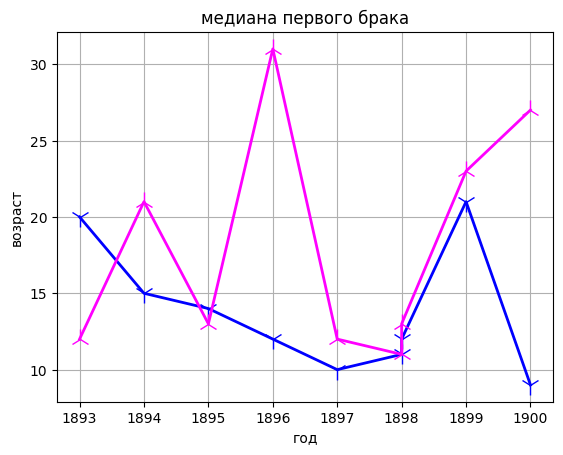

In [14]:
import numpy as np
import matplotlib.pyplot as plt

year, age_m, age_f = np.loadtxt('eg7-marriage-ages.txt', unpack=True,skiprows=3)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(year, age_m, marker='1', markersize=14, c='blue', lw=2,mfc='blue', mec='blue')
ax.plot(year, age_f, marker='2', markersize=14, c='magenta', lw=2,mfc='magenta', mec='magenta')

ax.grid()

ax.set_xlabel('год')
ax.set_ylabel('возраст')
ax.set_title('медиана первого брака')

plt.show()

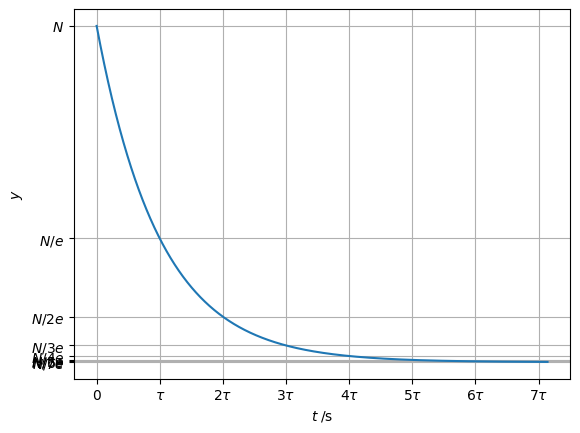

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# Initial value of y at t=0, lifetime in s
N, tau = 10000, 28
# Maximum time to consider (s)
tmax = 200
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 2000)
y = N * np.exp(-t/tau)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, y)
# The number of lifetimes that fall within the plotted time interval
ntau = tmax // tau + 1
# xticks at 0, tau, 2*tau, ..., ntau*tau; yticks at the corresponding y-values
xticks = [i*tau for i in range(ntau)]
yticks = [N * np.exp(-i) for i in range(ntau)]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# xtick labels: 0, tau, 2tau, ...
xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2,ntau)]
ax.set_xticklabels(xtick_labels)
# corresponding ytick labels: N, N/e, N/2e, ...
ytick_labels = [r'$N$',r'$N/e$'] + [r'$N/{}e$'.format(k) for k in range(2,ntau)]
ax.set_yticklabels(ytick_labels)
ax.set_xlabel(r'$t\;/\mathrm{s}$')
ax.set_ylabel(r'$y$')
ax.grid()
plt.show()
plt.draw()
fig.savefig('Lifetimes of an exponential decay.png', dpi=500)

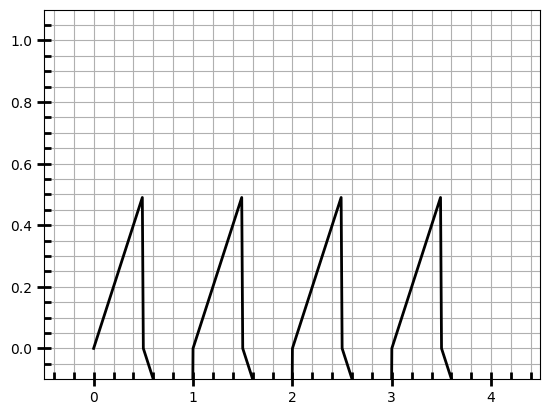

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# A selection of functions on rn abcissa points for 0 <= x < 1
rn = 100
rx = np.linspace(0, 1, rn, endpoint=False)

def tophat(rx):
    """ Top hat function: y = 1 for x < 0.5, y=0 for x >= 0.5 """
    ry = np.ones(rn)
    ry[rx >= 0.5] = 0
    return ry

def half_sawtooth(rx):
    """ Half sawtooth wave: y = x for 0 <= x < 0.5, y = 0.5 - x for 0.5 <= x < 1 """
    ry = np.where(rx < 0.5, rx, 0.5 - rx)
    return ry

# A dictionary of functions to choose from
ry = {'half-sawtooth': half_sawtooth,
      'top-hat': tophat,
      'sawtooth': lambda rx: 2 * np.abs(rx - 0.5)}

# Repeat the chosen function nrep times
nrep = 4
x = np.linspace(0, nrep, nrep * rn, endpoint=False)
y = np.tile(ry['half-sawtooth'](rx), nrep)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'k', lw=2)
# Add a bit of padding around the plotted line to aid visualization
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(x[0] - 0.5, x[-1] + 0.5)
# Customize the tick marks and turn the grid on
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.grid(which='both')
plt.show()


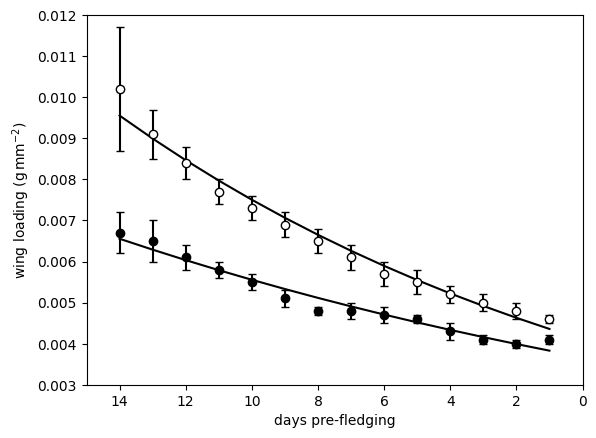

<Figure size 640x480 with 0 Axes>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Read in the data: day before fledging, wing loading and error for two broods.
dt = np.dtype([('day', 'i2'), ('wl1', 'f8'), ('wl1-err', 'f8'),
               ('wl2', 'f8'), ('wl2-err', 'f8')])
data = np.loadtxt('fledging-data.csv', dtype=dt, delimiter=',')

# Weighted fit of exponential decay to the data. This is a linear least-squares
# problem because y = Aexp(-Bx) => ln y = ln A - Bx = mx + c.
p1_fit = np.poly1d(np.polyfit(data['day'], np.log(data['wl1']), 1,
                   w=np.log(data['wl1'])**-2))
p2_fit = np.poly1d(np.polyfit(data['day'], np.log(data['wl2']), 1,
                   w=np.log(data['wl2'])**-2))
wl1fit = np.exp(p1_fit(data['day']))
wl2fit = np.exp(p2_fit(data['day']))

# Plot the data points with their uncertainties and the fits.
fig, ax = plt.subplots()
# wl1 data: white circles, black borders, with error bars.
ax.errorbar(data['day'], data['wl1'], yerr=data['wl1-err'], ls='', marker='o',
             color='k', mfc='w', mec='k', capsize=3)
ax.plot(data['day'], wl1fit, 'k', lw=1.5)

# wl2 data: black filled circles, with error bars.
ax.errorbar(data['day'], data['wl2'], yerr=data['wl2-err'], ls='', marker='o',
             color='k', mfc='k', mec='k', capsize=3)
ax.plot(data['day'], wl2fit, 'k', lw=1.5)

ax.set_xlim(15, 0)
ax.set_ylim(0.003, 0.012)
ax.set_xlabel('days pre-fledging')
ax.set_ylabel('wing loading ($\mathrm{g\,mm^{-2}}$)')
plt.show()
plt.draw()
fig.savefig('Fledging bird weights.png', dpi=500)


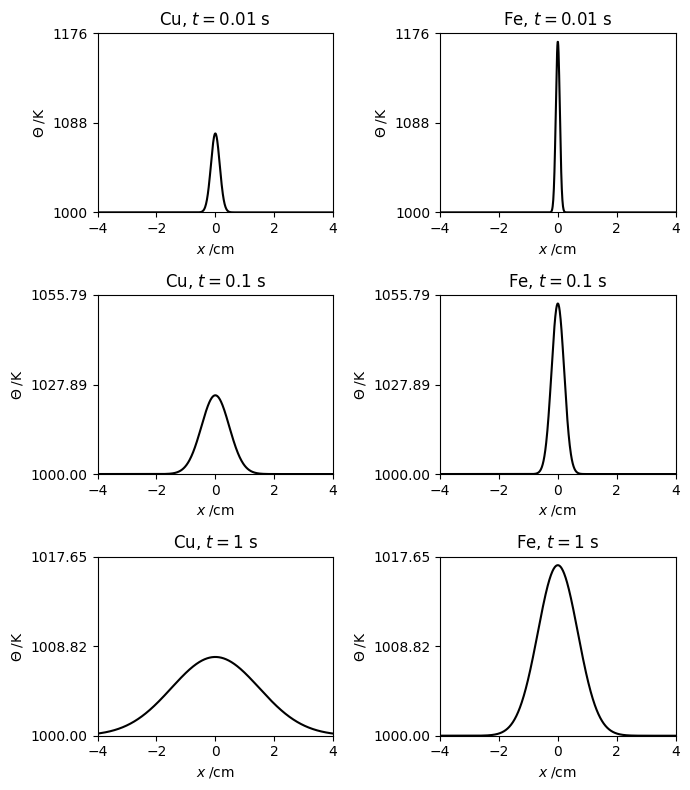

<Figure size 640x480 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

A, H = 1.e-4, 1.e3
theta0 = 1000
metals = np.array([('Cu', 3.45e7, 1.11e-4), ('Fe', 3.50e7, 2.3e-5)],
                  dtype=[('symbol', '|S2'), ('cp', 'f8'), ('D', 'f8')])

xlim, nx = 0.05, 1000
x = np.linspace(-xlim, xlim, nx)

times = (1e-2, 0.1, 1)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 8))

for j, t in enumerate(times):
    for i, metal in enumerate(metals):
        symbol, cp, D = metal
        ax = axes[j, i]
        theta = theta0 + H/cp/A/np.sqrt(D*t * 4*np.pi) * np.exp(-x**2/4/D/t)
        ax.plot(x*100, theta, 'k')
        ax.set_title('{}, $t={}$ s'.format(symbol.decode('utf8'), t))
        ax.set_xlim(-4, 4)
        ax.set_xlabel('$x\;/\mathrm{cm}$')
        ax.set_ylabel('$\Theta\;/\mathrm{K}$')

for j in (0,1,2):
    ymax = max(axes[j,0].get_ylim()[1], axes[j,1].get_ylim()[1])
    for i in (0,1):
        ax = axes[j,i]
        ax.set_ylim(theta0, ymax)
        ax.set_yticks([theta0, (ymax + theta0)/2, ymax])

fig.tight_layout()
plt.show()
plt.draw()
fig.savefig('The one-dimensional diffusion equation.png', dpi=500)


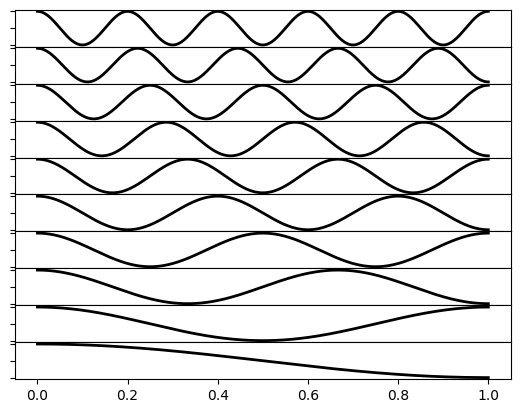

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

nrows = 10
fig, axes = plt.subplots(nrows, 1)
# Zero vertical space between subplots
fig.subplots_adjust(hspace=0)
x = np.linspace(0, 1, 1000)
for i in range(nrows):
    # n=nrows for the top subplot, n=0 for the bottom subplot
    n = nrows - i
    axes[i].plot(x, np.cos(n * np.pi * x), 'k', lw=2)  # Changed to cos(x)
    # We only want ticks on the bottom of each subplot
    axes[i].xaxis.set_ticks_position('bottom')
    if i < nrows-1:
        # Set ticks at the nodes (zeros) of our cosine functions
        axes[i].set_xticks(np.arange(0, 1, 1/n))
        # We only want labels on the bottom subplot xaxis
        axes[i].set_xticklabels('')
    axes[i].set_yticklabels('')

plt.show()
plt.draw()
fig.savefig('Ganged subplots.png', dpi=100)
